In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import numpy as np

In [4]:
path = "C:\\Users\\boehm\\FAUbox\\MA\\data\\lcms\\ms\\profils\\"

In [5]:
paths=[]
os.chdir(path)
for DIR in os.listdir('.'): #to get folder
    if not os.path.isdir(DIR):
        pass
    else:
        os.chdir(DIR)
    for FILE in os.listdir('.'): #to get file
        if FILE.endswith(".csv"):
            filei = str(path+ DIR +'\\'+FILE)
            paths.append(filei) #paths is list of paths to all .csv-files
            FILE2=FILE.replace('.csv','') #variable that can be used for naming plot
            #print(DIR+'_'+FILE2)
        else:
            pass
    
    os.chdir(path)

            x      y  labels
0      200.20  593.0     NaN
1      200.90  143.0     NaN
2      202.10  851.0     NaN
3      203.10  161.0     NaN
4      203.90  590.0     NaN
...       ...    ...     ...
1005  1195.10  390.0     NaN
1006  1196.05  350.0     NaN
1007  1197.35  378.0     NaN
1008  1198.45  541.0     NaN
1009  1199.20  219.0     NaN

[1010 rows x 3 columns]
            x      y  labels  new_label
0      200.20  593.0     NaN        NaN
1      200.90  143.0     NaN        NaN
2      202.10  851.0     NaN        NaN
3      203.10  161.0     NaN        NaN
4      203.90  590.0     NaN        NaN
...       ...    ...     ...        ...
1005  1195.10  390.0     NaN        NaN
1006  1196.05  350.0     NaN        NaN
1007  1197.35  378.0     NaN        NaN
1008  1198.45  541.0     NaN        NaN
1009  1199.20  219.0     NaN        NaN

[1010 rows x 4 columns]


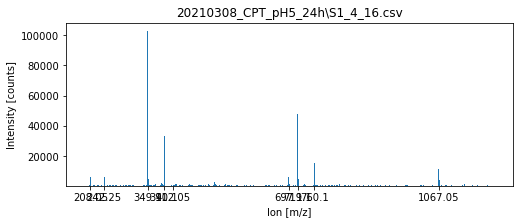

           x        y  labels
0     200.20   8982.0  200.20
1     202.40   1896.0     NaN
2     202.85  19411.0  202.85
3     203.40   1410.0     NaN
4     204.40   1149.0     NaN
..       ...      ...     ...
952  1196.15    361.0     NaN
953  1196.95    389.0     NaN
954  1197.70    378.0     NaN
955  1198.75    709.0     NaN
956  1199.40    124.0     NaN

[957 rows x 3 columns]
           x        y  labels  new_label
0     200.20   8982.0  200.20       0.00
1     202.40   1896.0     NaN        NaN
2     202.85  19411.0  202.85     202.85
3     203.40   1410.0     NaN        NaN
4     204.40   1149.0     NaN        NaN
..       ...      ...     ...        ...
952  1196.15    361.0     NaN        NaN
953  1196.95    389.0     NaN        NaN
954  1197.70    378.0     NaN        NaN
955  1198.75    709.0     NaN        NaN
956  1199.40    124.0     NaN        NaN

[957 rows x 4 columns]


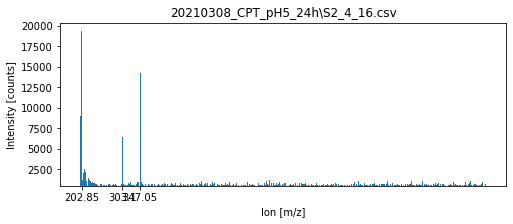

            x      y  labels
0      200.15  286.0     NaN
1      201.10  531.0     NaN
2      202.00  585.0     NaN
3      203.20  505.0     NaN
4      204.40  425.0     NaN
...       ...    ...     ...
1007  1194.65  454.0     NaN
1008  1195.95  528.0     NaN
1009  1197.00  127.0     NaN
1010  1198.35  757.0     NaN
1011  1199.80  683.0     NaN

[1012 rows x 3 columns]
            x      y  labels  new_label
0      200.15  286.0     NaN        NaN
1      201.10  531.0     NaN        NaN
2      202.00  585.0     NaN        NaN
3      203.20  505.0     NaN        NaN
4      204.40  425.0     NaN        NaN
...       ...    ...     ...        ...
1007  1194.65  454.0     NaN        NaN
1008  1195.95  528.0     NaN        NaN
1009  1197.00  127.0     NaN        NaN
1010  1198.35  757.0     NaN        NaN
1011  1199.80  683.0     NaN        NaN

[1012 rows x 4 columns]


KeyboardInterrupt: 

In [31]:
for STEP in paths:
    STEP2=STEP.replace(path,'')
    df = pd.read_csv(STEP, skiprows=[1], header=0, names=['x','y'])
    da = pd.DataFrame(df)
    med=da['y'].median() # MEDIAN
    thresh = 10*med
    distance = 3
    d1 = da[:][da['y']> thresh] #creates matrix with only the peaks and x with correct threshold
    da['labels'] = d1['x']
    da['labels'].astype(str)
    labels = da['labels'].tolist()
        #print(np.isnan(labels))
    for index, label in enumerate(labels): #creates a list of 0 and 1. 1 == above threshold, 0==below. the list is then mutliplied to to elimnate every peak below the set threshold.
        if np.isnan(label):
            labels[index] = 0
        else:
            labels[index] = 1

    df1 = da['y']*labels

    labels_height = df1.tolist()
   
    for index, height in enumerate(labels_height):#this for loop will eliminate near peaks, set distance above high to get only very high peaks without their neighbours
        for i in range(distance):   #this for loop will iterate over the number saved as distance to kill the nerast, the second nersat ... the "distance"nd nearest peak that is smaller          
            if labels_height[index] < labels_height[index-i]:
                labels_height[index] = 0
            else: 
                if labels_height[index-i] < labels_height[index]:
                    labels_height[index-i] = 0

    for index, height in enumerate(labels_height): #converts the list i just generated to list of 0 and 1 so i can multipy with labes generated above, only the ones are kept that are okay with the distance function
        if labels_height[index] > 0:
            labels_height[index] = 1
                  
            
    da['new_label'] = da['labels']*labels_height                    
    d2 = da[:][np.isfinite(da['new_label']) & da['new_label'] != 0] #creates a data frame with only the labes i want, with x values for the xtics

    print(da)
    fig = plt.figure(figsize=(8,3))
    da2 = med < da['y']
    da3 = da2 * da['y']
    plt.bar(da['x'], da3, width=2)
    #plt.bar(da['x'],da['y'],width= 2) #PEAK WIDTH BELOW 0.8 not visible
    #X = list(da.iloc[:, 0])
    #Y = list(da.iloc[:, 1])
    # Plot the data using bar() method
    #plt.bar(X, Y, color='g')
    plt.ylim(med,)
    plt.title(STEP2)
    plt.xlabel("Ion [m/z]")
    plt.ylabel("Intensity [counts]")
   
    plt.xticks(ticks=d2['x'], labels=d2['new_label'].tolist())
    
    
    
    
    
# Show the plot
    plt.show()

In [28]:
print(d2)

       x        y  labels  new_label
4  203.8  15283.0   203.8      203.8
